In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('loan_prediction.csv')
df.head(50)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


### Pre Processing

We could drop Loan_ID as its not going to have an impact on our results.

In [3]:
df.drop('Loan_ID',axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


We have 8 columns which are Object type.

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


We see variance in the Mean and Median

In [6]:
df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [7]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We see that there are null values present in the dataset

### Working on Null values

In [8]:
df['Gender'].mode()

0    Male
dtype: object

In [9]:
df['Gender'] = df['Gender'].fillna('Male')

In [10]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [11]:
df['Married'].mode()

0    Yes
dtype: object

In [12]:
df['Married'] = df['Married'].fillna('Yes')

In [13]:
df['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
df['Dependents'].mode()

0    0
dtype: object

In [15]:
df['Dependents'] = df['Dependents'].fillna('0')

In [16]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [17]:
df['Self_Employed'].mode()

0    No
dtype: object

In [18]:
df['Self_Employed'] = df['Self_Employed'].fillna('No')

In [19]:
df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [20]:
np.round((df['LoanAmount'].mean()),0)

146.0

In [21]:
df['LoanAmount'] = df['LoanAmount'].fillna(146.0)

In [22]:
df['LoanAmount'].unique()

array([146., 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [23]:
df['Loan_Amount_Term'].mode()

0    360.0
dtype: float64

In [24]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(360.0)

In [25]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [26]:
df['Credit_History'].mode()

0    1.0
dtype: float64

In [27]:
df['Credit_History'] = df['Credit_History'].fillna(1.0)

In [28]:
df['Credit_History'].unique()

array([1., 0.])

In [29]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

We do not have any null values anymore.

### Visualization

In [30]:
cat_columns = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        cat_columns.append(i)
cat_columns.remove('Loan_Status')
cat_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [31]:
def Plot (cat_column):
    print('Value Count :',cat_column)
    print(df[cat_column].value_counts())
    plt.figure(figsize=(10,7))
    sns.countplot(df[cat_column],hue=df['Loan_Status'],palette='cool')
    plt.show()

Value Count : Gender
Male      502
Female    112
Name: Gender, dtype: int64


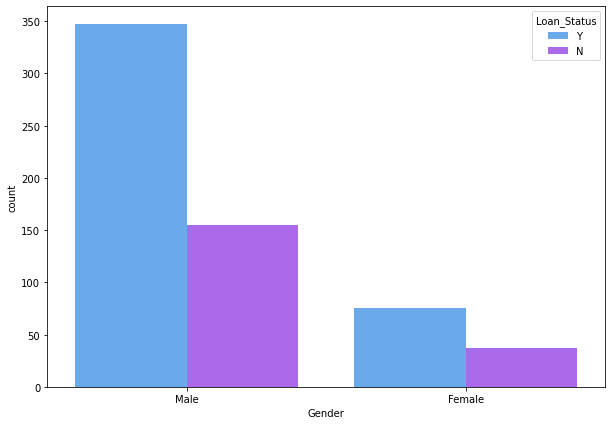

In [32]:
Plot('Gender')

- We see that the count of male applicants is higher than the female.

Value Count : Married
Yes    401
No     213
Name: Married, dtype: int64


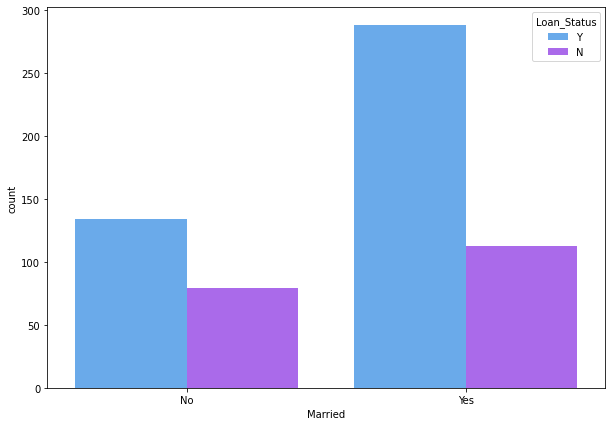

In [33]:
Plot('Married')

- We see that the loan applications are higher by Married People.
- Married applicants have a higher acceptance ratio than un-married.

Value Count : Dependents
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


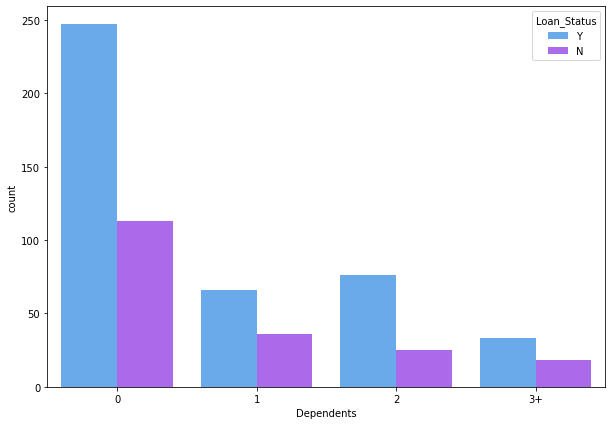

In [34]:
Plot('Dependents')

- We see that the Highest amount of Applicants have 0 dependents and the lowest have 3+
- The loan acceptance rate for 0 and 2 dependents is comparitively Higher than the others

Value Count : Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


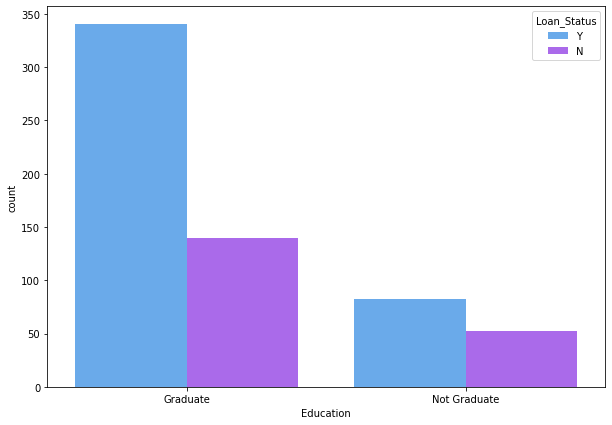

In [35]:
Plot('Education')

- We see a higher cout of applications by the Graduates.
- Graduates tend to have a higher acceptance than non-graduates.

Value Count : Self_Employed
No     532
Yes     82
Name: Self_Employed, dtype: int64


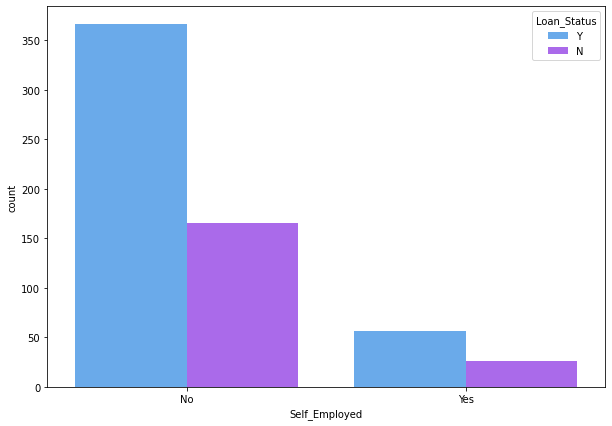

In [36]:
Plot('Self_Employed')

We see non self- Employed people tend to have a higher count for loans than self Employed.

Value Count : Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


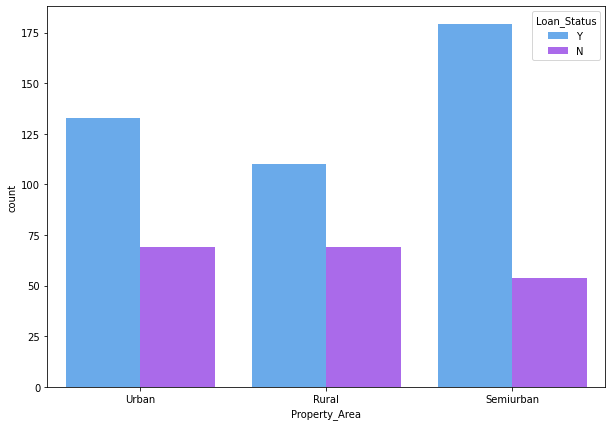

In [37]:
Plot('Property_Area')

- People from semi-urban ares hae the highest count of applications followed by Urban and then Rural.
- The acceptance ratio for applicants from Semi-Urban areas is the highest and the lowest for Rural areas.

Value Count : Credit_History
1.0    525
0.0     89
Name: Credit_History, dtype: int64


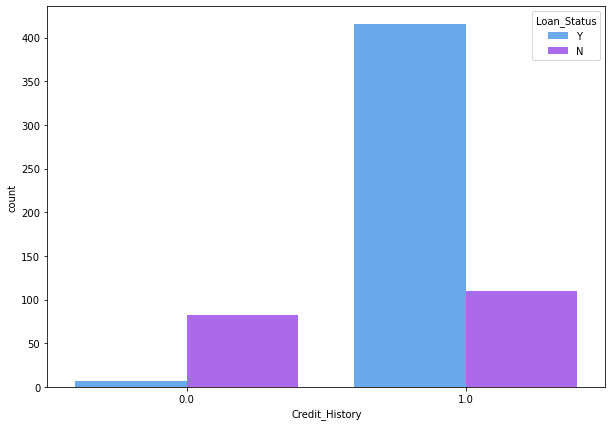

In [38]:
Plot('Credit_History')

- We see people with credit history 1 have the highest count.
- The loan application approval for credit History 1 has a High acceptance ratio and credit history 0 almost signifies rejection of application.

Value Count : Loan_Amount_Term
360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


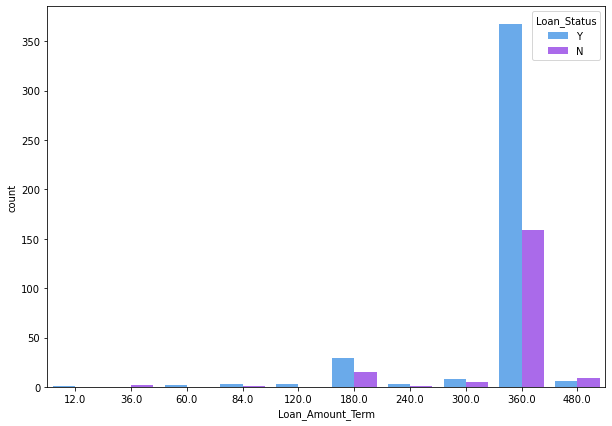

In [39]:
Plot('Loan_Amount_Term')

In [40]:
Term_Status = df.pivot_table(values = 'Loan_Status',index = 'Loan_Amount_Term',aggfunc=(lambda x:x.mode()))
Term_Status

,Loan_Status
Loan_Amount_Term,
12.0,Y
36.0,N
60.0,Y
84.0,Y
120.0,Y
180.0,Y
240.0,Y
300.0,Y
360.0,Y


We see that the Loan_Amount_Term 36.0 and 480.0 tends to have a High rejection rate

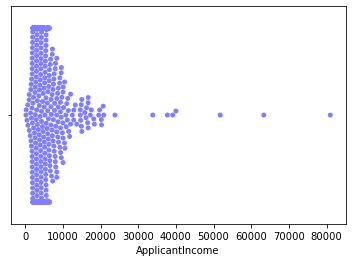

In [41]:
sns.swarmplot(df['ApplicantIncome'],palette='cool')
plt.show()

We see that the majority of the applicants earn between 0 to 10k.

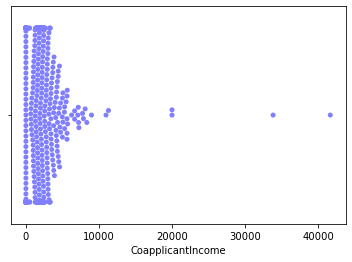

In [42]:
sns.swarmplot(df['CoapplicantIncome'],palette='cool')
plt.show()

We see that the majority of the co-applicants earn between 0 to 10k.

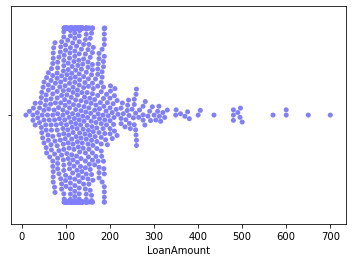

In [43]:
sns.swarmplot(df['LoanAmount'],palette='cool')
plt.show()

The highest ask for a loan amount is between 100-200.

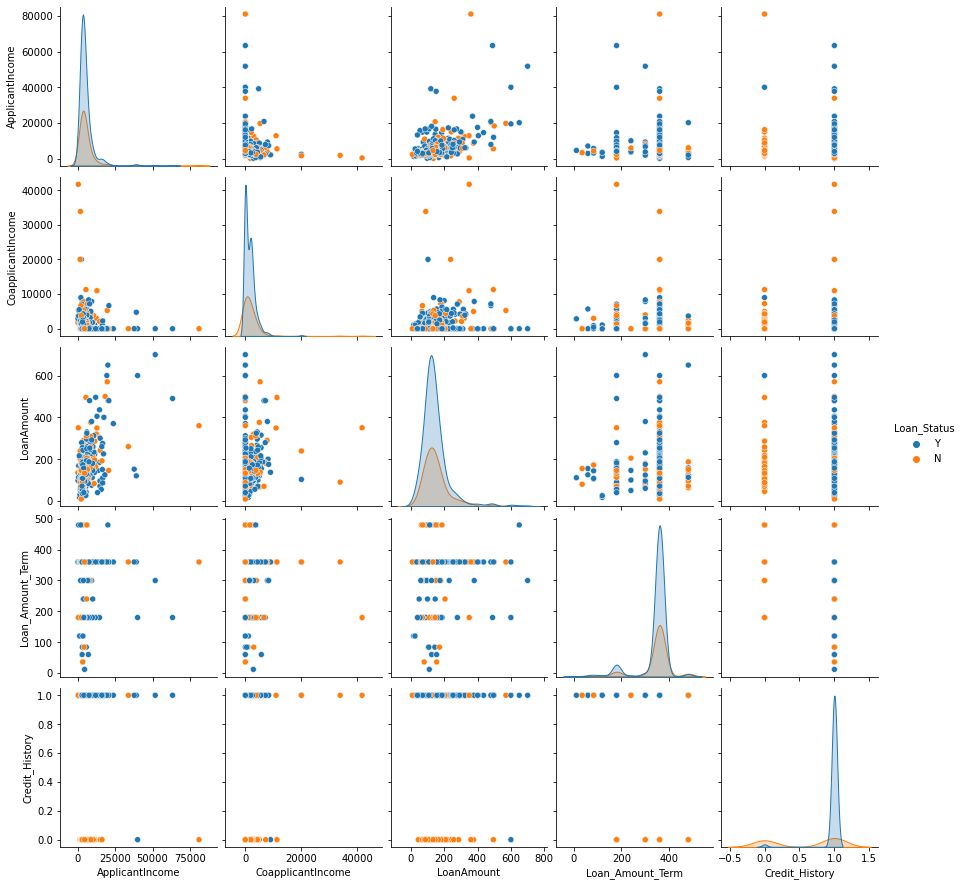

In [44]:
sns.pairplot(df,diag_kind='kde',hue='Loan_Status')
plt.show()

We see that the data is both right and left skewed, we see noise in the data

### Checking Skewness

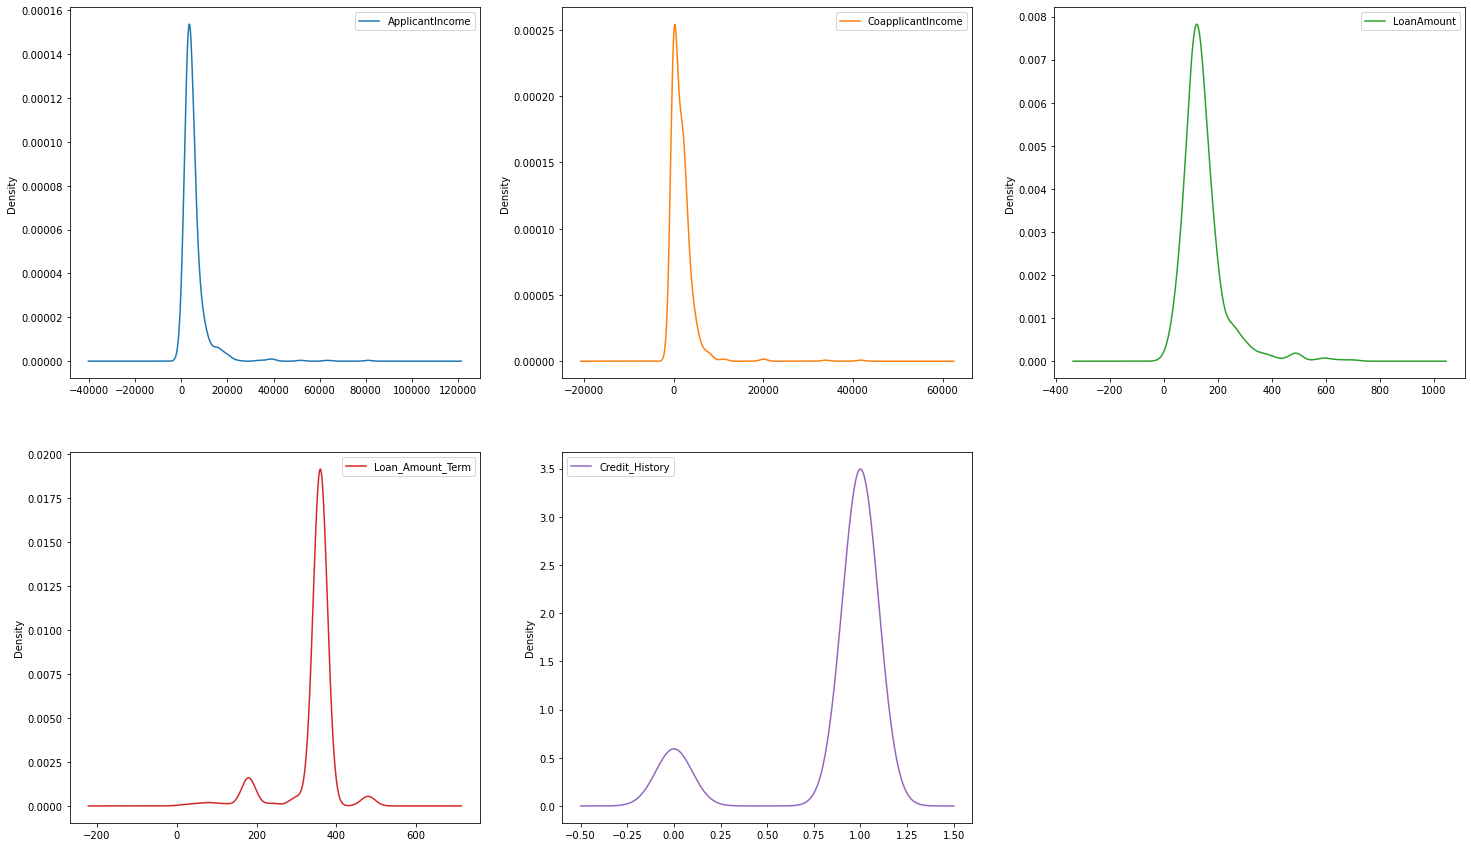

In [45]:
df.plot(kind='density',subplots=True,layout=(2,3),figsize=(25,15),sharex=False)
plt.show()

In [46]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.727127
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

- We see a hughe amount of skewness in the features and the features are both Right and Left Skewed.
- Lets set the skewness threshod as +/-0.75

### Checking Outliers

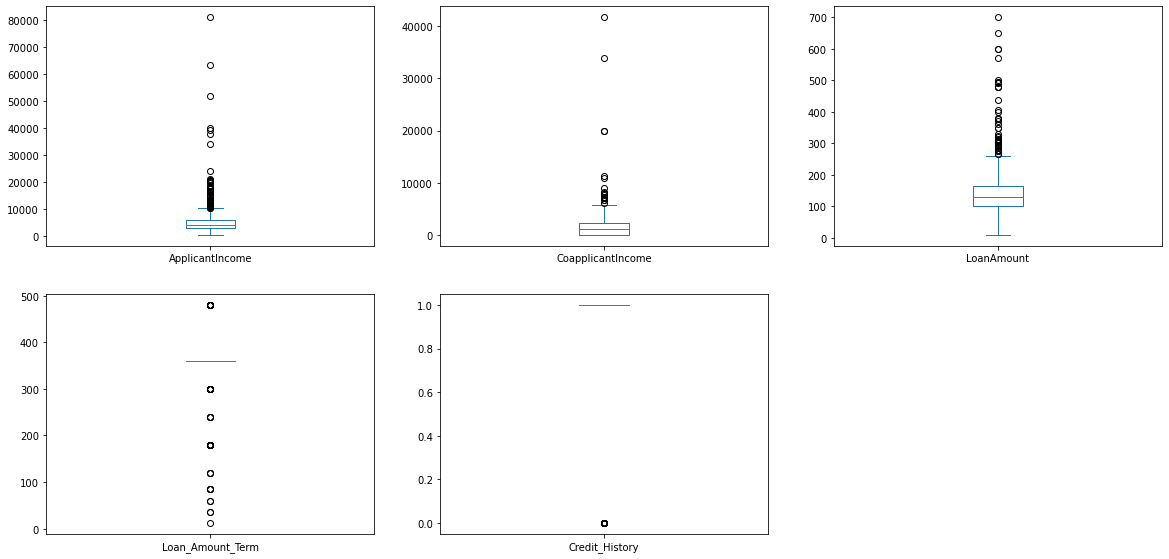

In [47]:
df.plot(kind='box',subplots=True,layout=(3,3),figsize=(20,15),sharex=True)
plt.show()

We see presesence of outliers in all the columns, we can ignore Credit_History as its categorical column.

### Encoding the Data

In [48]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

In [50]:
df['Dependents'] = le.fit_transform(df['Dependents'])

In [51]:
df = pd.get_dummies(df,columns=['Gender','Education','Self_Employed','Property_Area','Married','Credit_History'])

In [52]:
df

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Female,Gender_Male,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Married_No,Married_Yes,Credit_History_0.0,Credit_History_1.0
0,0,5849,0.0,146.0,360.0,1,0,1,1,0,1,0,0,0,1,1,0,0,1
1,1,4583,1508.0,128.0,360.0,0,0,1,1,0,1,0,1,0,0,0,1,0,1
2,0,3000,0.0,66.0,360.0,1,0,1,1,0,0,1,0,0,1,0,1,0,1
3,0,2583,2358.0,120.0,360.0,1,0,1,0,1,1,0,0,0,1,0,1,0,1
4,0,6000,0.0,141.0,360.0,1,0,1,1,0,1,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1,1,0,1,0,1,0,1,0,0,1,0,0,1
610,3,4106,0.0,40.0,180.0,1,0,1,1,0,1,0,1,0,0,0,1,0,1
611,1,8072,240.0,253.0,360.0,1,0,1,1,0,1,0,0,0,1,0,1,0,1
612,2,7583,0.0,187.0,360.0,1,0,1,1,0,1,0,0,0,1,0,1,0,1


### Checking Correlation

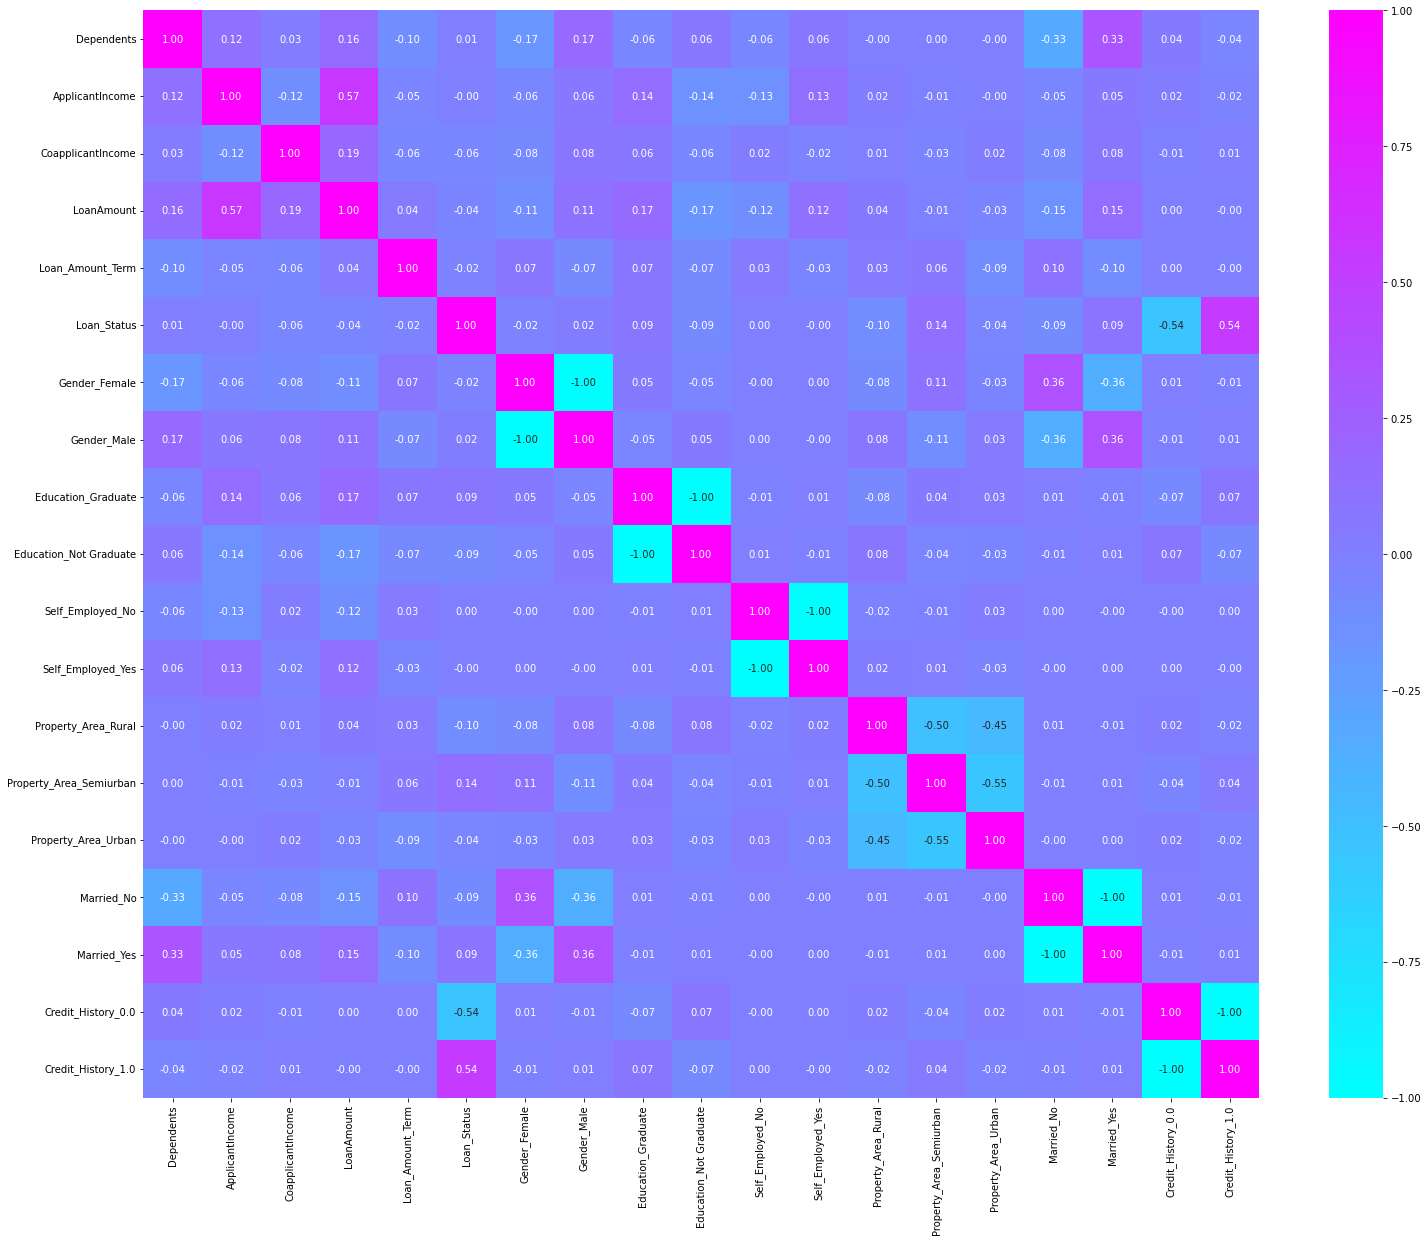

In [53]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True,cmap='cool',fmt='.2f')
plt.show()

- We see that the credit history has the highest correlation with Target Variable(Loan_Status)

### Removing Outliers

In [54]:
from scipy.stats import zscore

In [55]:
[(np.abs(zscore(df))<3).all()]

[Dependents                  True
 ApplicantIncome            False
 CoapplicantIncome          False
 LoanAmount                 False
 Loan_Amount_Term           False
 Loan_Status                 True
 Gender_Female               True
 Gender_Male                 True
 Education_Graduate          True
 Education_Not Graduate      True
 Self_Employed_No            True
 Self_Employed_Yes           True
 Property_Area_Rural         True
 Property_Area_Semiurban     True
 Property_Area_Urban         True
 Married_No                  True
 Married_Yes                 True
 Credit_History_0.0          True
 Credit_History_1.0          True
 dtype: bool]

We see outliers present in 'ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'.

In [56]:
z = np.abs(zscore(df))
z.shape

(614, 19)

In [57]:
df = df[(z<3).all(axis=1)]
df.shape

(577, 19)

### Percentage Data Loss

In [58]:
percentage_loss = (614-577)/614*100
percentage_loss

6.026058631921824

### Splitting the data into Features and Target

In [59]:
x = df.drop('Loan_Status',axis=1)
x.shape

(577, 18)

In [60]:
y = df['Loan_Status']
y.shape

(577,)

### Removing Skewness using Power_Transform

In [61]:
from sklearn.preprocessing import power_transform

In [62]:
X = power_transform(x)
X = pd.DataFrame(X,columns=x.columns)
X

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Married_No,Married_Yes,Credit_History_0.0,Credit_History_1.0
0,-0.809243,0.681780,-1.122446,0.309321,0.130788,-0.477137,0.477137,0.541961,-0.541961,0.380580,-0.380580,-0.648986,-0.776388,1.432798,1.362511,-1.362511,-0.418513,0.418513
1,0.902869,0.234783,0.744117,-0.015522,0.130788,-0.477137,0.477137,0.541961,-0.541961,0.380580,-0.380580,1.540866,-0.776388,-0.697935,-0.733939,0.733939,-0.418513,0.418513
2,-0.809243,-0.527201,-1.122446,-1.443042,0.130788,-0.477137,0.477137,0.541961,-0.541961,-2.627567,2.627567,-0.648986,-0.776388,1.432798,-0.733939,0.733939,-0.418513,0.418513
3,-0.809243,-0.791972,0.895786,-0.169525,0.130788,-0.477137,0.477137,-1.845150,1.845150,0.380580,-0.380580,-0.648986,-0.776388,1.432798,-0.733939,0.733939,-0.418513,0.418513
4,-0.809243,0.728848,-1.122446,0.221843,0.130788,-0.477137,0.477137,0.541961,-0.541961,0.380580,-0.380580,-0.648986,-0.776388,1.432798,1.362511,-1.362511,-0.418513,0.418513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,-0.809243,-0.587375,-1.122446,-1.301367,0.130788,2.095835,-2.095835,0.541961,-0.541961,0.380580,-0.380580,1.540866,-0.776388,-0.697935,1.362511,-1.362511,-0.418513,0.418513
573,1.533596,0.035386,-1.122446,-2.322157,-2.562700,-0.477137,0.477137,0.541961,-0.541961,0.380580,-0.380580,1.540866,-0.776388,-0.697935,-0.733939,0.733939,-0.418513,0.418513
574,0.902869,1.281658,0.173344,1.838343,0.130788,-0.477137,0.477137,0.541961,-0.541961,0.380580,-0.380580,-0.648986,-0.776388,1.432798,-0.733939,0.733939,-0.418513,0.418513
575,1.344671,1.164426,-1.122446,0.961907,0.130788,-0.477137,0.477137,0.541961,-0.541961,0.380580,-0.380580,-0.648986,-0.776388,1.432798,-0.733939,0.733939,-0.418513,0.418513


In [63]:
a = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
non_cat_columns = X[a]
non_cat_columns.skew()

ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.047739
Loan_Amount_Term     0.727533
dtype: float64

We see that the values are within the threshold

### VIF

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [65]:
def calculate_vif(dataset):
    Vif =pd.DataFrame()
    Vif['Features'] = dataset.columns
    Vif['Values'] = [variance_inflation_factor(dataset.values,i)for i in range(dataset.shape[1])]
    return Vif.sort_values(by='Values',ascending=False)

In [66]:
calculate_vif(non_cat_columns)

,Features,Values
0,ApplicantIncome,1.681695
2,LoanAmount,1.507833
1,CoapplicantIncome,1.403017
3,Loan_Amount_Term,1.016977


- Lets set VIF Threshold as 5.
- We see that the VIF is well with in the threshold

### Checking if the dataset is Balanced

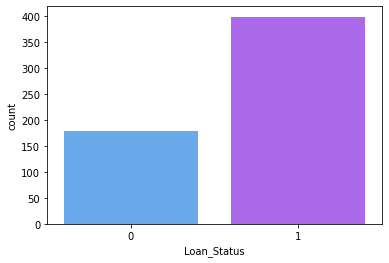

In [67]:
sns.countplot(y,palette='cool')
plt.show()

We see that the dataset is not balanced and will have to be balanced

### Balancing the dataset using SMOTE

In [68]:
from imblearn.over_sampling import SMOTE

In [69]:
sm = SMOTE()
X,y = sm.fit_resample(X,y)
X.shape,y.shape

((796, 18), (796,))

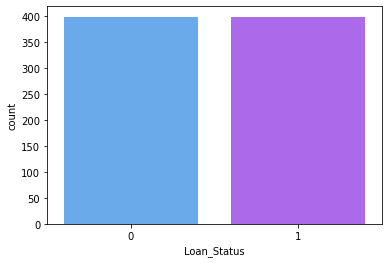

In [70]:
sns.countplot(y,palette='cool')
plt.show()

We see that the data is balanced now.

### Scaling the data using Standard Scaler

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
sc = StandardScaler()
X = sc.fit_transform(X)
X = pd.DataFrame(X,columns=x.columns)
X

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Married_No,Married_Yes,Credit_History_0.0,Credit_History_1.0
0,-0.805839,0.700372,-1.130199,0.320966,0.106171,-0.475658,0.475658,0.548604,-0.548604,0.369523,-0.369523,-0.704726,-0.728411,1.440777,1.333403,-1.333403,-0.569404,0.569404
1,0.960641,0.236535,0.775614,-0.020951,0.106171,-0.475658,0.475658,0.548604,-0.548604,0.369523,-0.369523,1.451084,-0.728411,-0.713995,-0.763065,0.763065,-0.569404,0.569404
2,-0.805839,-0.554155,-1.130199,-1.523501,0.106171,-0.475658,0.475658,0.548604,-0.548604,-2.726230,2.726230,-0.704726,-0.728411,1.440777,-0.763065,0.763065,-0.569404,0.569404
3,-0.805839,-0.828901,0.930473,-0.183048,0.106171,-0.475658,0.475658,-1.844801,1.844801,0.369523,-0.369523,-0.704726,-0.728411,1.440777,-0.763065,0.763065,-0.569404,0.569404
4,-0.805839,0.749213,-1.130199,0.228891,0.106171,-0.475658,0.475658,0.548604,-0.548604,0.369523,-0.369523,-0.704726,-0.728411,1.440777,1.333403,-1.333403,-0.569404,0.569404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,-0.489785,-0.706936,-0.783087,-1.476909,0.106171,-0.475658,0.475658,0.548604,-0.548604,0.369523,-0.369523,-0.704726,-0.728411,1.440777,-0.763065,0.763065,1.765464,-1.765464
792,0.480690,0.567751,0.918054,0.956971,0.106171,-0.475658,0.475658,0.548604,-0.548604,0.369523,-0.369523,1.451084,-0.728411,-0.713995,-0.763065,0.763065,-0.569404,0.569404
793,-0.805839,1.061678,-0.103683,1.203797,0.106171,-0.475658,0.475658,0.548604,-0.548604,0.369523,-0.369523,-0.704726,1.403012,-0.713995,-0.763065,0.763065,-0.569404,0.569404
794,-0.805839,-0.143466,1.148848,0.826458,0.106171,-0.475658,0.475658,0.548604,-0.548604,0.369523,-0.369523,-0.704726,-0.728411,1.440777,1.002335,-1.002335,-0.569404,0.569404


### Building Initial Model

In [73]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [74]:
lr = LogisticRegression()

Max_accuracy = 0
best_random_state = 0

for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    accuracy = accuracy_score(y_test,pred)
    if accuracy > Max_accuracy:
        Max_accuracy = accuracy
        best_random_state = i
print('The best accuracy is ', Max_accuracy,'for random_state', best_random_state)

The best accuracy is  0.7866108786610879 for random_state 86


In [76]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=86)
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
accuracy = accuracy_score(y_test,pred)*100
print('Base Model Report :',lr)
print('Accuracy Score',accuracy)
print(classification_report(y_test,pred))

Base Model Report : LogisticRegression()
Accuracy Score 78.66108786610879
              precision    recall  f1-score   support

           0       0.80      0.68      0.73       103
           1       0.78      0.87      0.82       136

    accuracy                           0.79       239
   macro avg       0.79      0.77      0.78       239
weighted avg       0.79      0.79      0.78       239



In [77]:
from sklearn.model_selection import cross_val_score

In [79]:
for j in range(2,20):
    cv = cross_val_score(lr,X,y,cv=j)
    cv_score = np.mean(cv)
    print('at',j,'cross validation score is',cv_score,'and the accuracy is',accuracy)

at 2 cross validation score is 0.7198492462311559 and the accuracy is 78.66108786610879
at 3 cross validation score is 0.7236203716839267 and the accuracy is 78.66108786610879
at 4 cross validation score is 0.7198492462311558 and the accuracy is 78.66108786610879
at 5 cross validation score is 0.7274135220125786 and the accuracy is 78.66108786610879
at 6 cross validation score is 0.7248803827751195 and the accuracy is 78.66108786610879
at 7 cross validation score is 0.7248652604963738 and the accuracy is 78.66108786610879
at 8 cross validation score is 0.7199116161616161 and the accuracy is 78.66108786610879
at 9 cross validation score is 0.7249886505504484 and the accuracy is 78.66108786610879
at 10 cross validation score is 0.722357594936709 and the accuracy is 78.66108786610879
at 11 cross validation score is 0.7248685484986854 and the accuracy is 78.66108786610879
at 12 cross validation score is 0.719828885873662 and the accuracy is 78.66108786610879
at 13 cross validation score is

In [80]:
def Model(model):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=86)
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,pred)*100
    cv = cross_val_score(model,X,y,cv=13)
    cv_score = cv.mean()*100
    print('Report for model', model)
    print('The Accuracy Score is', accuracy)
    print('Confussion Matrix :','\n',confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('Cross Validation Score is ', cv_score)
    print()
    print('Difference between accuracy score and cv is',accuracy-cv_score)

In [81]:
Model(lr)

Report for model LogisticRegression()
The Accuracy Score is 78.66108786610879
Confussion Matrix : 
 [[ 70  33]
 [ 18 118]]
              precision    recall  f1-score   support

           0       0.80      0.68      0.73       103
           1       0.78      0.87      0.82       136

    accuracy                           0.79       239
   macro avg       0.79      0.77      0.78       239
weighted avg       0.79      0.79      0.78       239

Cross Validation Score is  72.99759996745719

Difference between accuracy score and cv is 5.663487898651596


In [82]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
Model(knn)

Report for model KNeighborsClassifier()
The Accuracy Score is 77.82426778242679
Confussion Matrix : 
 [[ 79  24]
 [ 29 107]]
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       103
           1       0.82      0.79      0.80       136

    accuracy                           0.78       239
   macro avg       0.77      0.78      0.78       239
weighted avg       0.78      0.78      0.78       239

Cross Validation Score is  75.8857747223691

Difference between accuracy score and cv is 1.9384930600576809


In [83]:
from sklearn.svm import SVC

svc = SVC()
Model(svc)

Report for model SVC()
The Accuracy Score is 78.24267782426779
Confussion Matrix : 
 [[ 66  37]
 [ 15 121]]
              precision    recall  f1-score   support

           0       0.81      0.64      0.72       103
           1       0.77      0.89      0.82       136

    accuracy                           0.78       239
   macro avg       0.79      0.77      0.77       239
weighted avg       0.79      0.78      0.78       239

Cross Validation Score is  74.7630476345442

Difference between accuracy score and cv is 3.4796301897235935


Report for model DecisionTreeClassifier()
The Accuracy Score is 78.66108786610879
Confussion Matrix : 
 [[ 80  23]
 [ 28 108]]
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       103
           1       0.82      0.79      0.81       136

    accuracy                           0.79       239
   macro avg       0.78      0.79      0.78       239
weighted avg       0.79      0.79      0.79       239

Cross Validation Score is  76.16442256844161

Difference between accuracy score and cv is 2.496665297667178


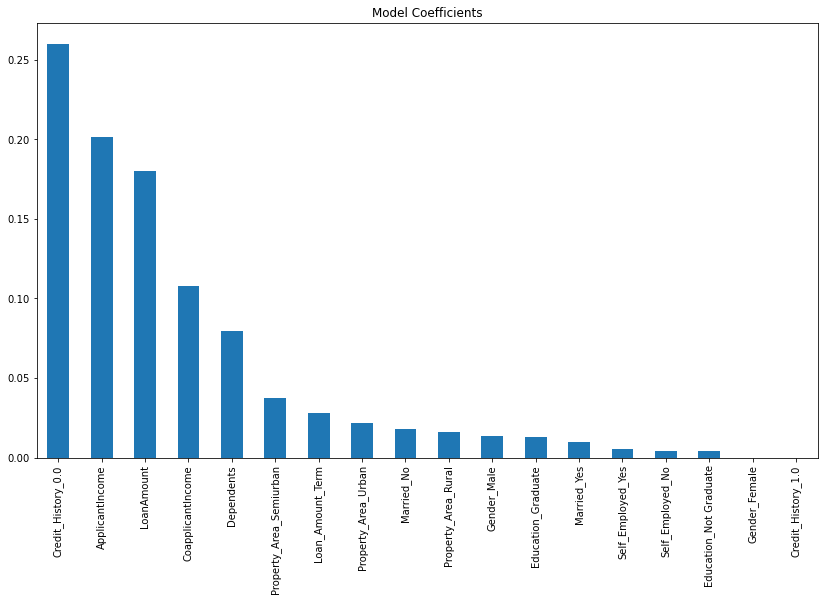

In [84]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
Model(dtc)
coef = pd.Series(dtc.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind= 'bar', title = 'Model Coefficients',figsize=(14,8))
plt.show()

Report for model RandomForestClassifier()
The Accuracy Score is 84.51882845188284
Confussion Matrix : 
 [[ 82  21]
 [ 16 120]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       103
           1       0.85      0.88      0.87       136

    accuracy                           0.85       239
   macro avg       0.84      0.84      0.84       239
weighted avg       0.84      0.85      0.84       239

Cross Validation Score is  82.4512874750844

Difference between accuracy score and cv is 2.0675409767984405


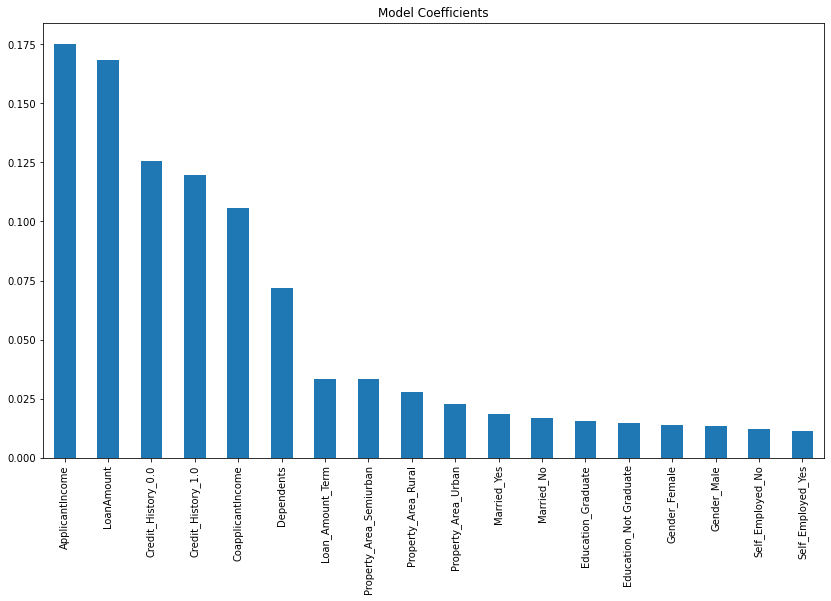

In [85]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
Model(rf)
coef = pd.Series(rf.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind= 'bar', title = 'Model Coefficients',figsize=(14,8))
plt.show()

Report for model ExtraTreesClassifier()
The Accuracy Score is 83.26359832635984
Confussion Matrix : 
 [[ 84  19]
 [ 21 115]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       103
           1       0.86      0.85      0.85       136

    accuracy                           0.83       239
   macro avg       0.83      0.83      0.83       239
weighted avg       0.83      0.83      0.83       239

Cross Validation Score is  83.07163486962534

Difference between accuracy score and cv is 0.19196345673449855


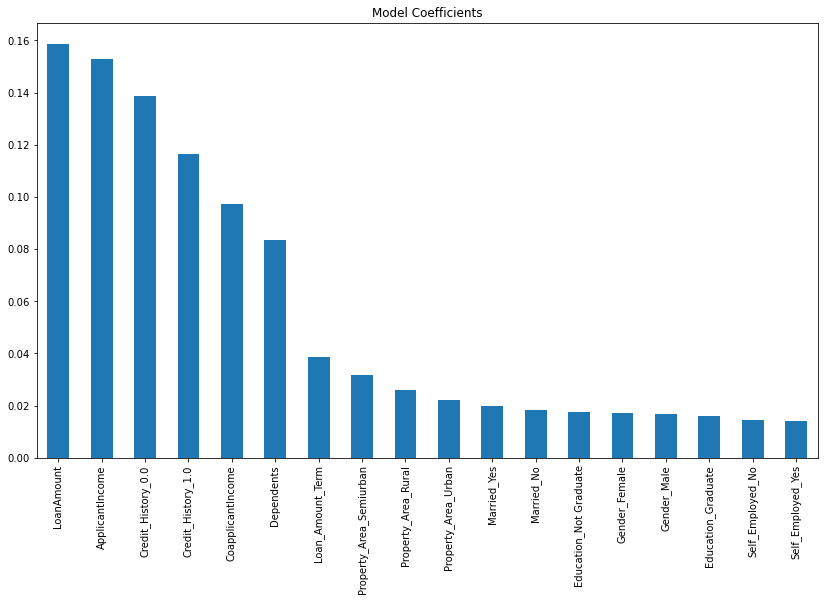

In [86]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier()
Model(et)
coef = pd.Series(et.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind= 'bar', title = 'Model Coefficients',figsize=(14,8))
plt.show()

Report for model AdaBoostClassifier()
The Accuracy Score is 78.24267782426779
Confussion Matrix : 
 [[ 71  32]
 [ 20 116]]
              precision    recall  f1-score   support

           0       0.78      0.69      0.73       103
           1       0.78      0.85      0.82       136

    accuracy                           0.78       239
   macro avg       0.78      0.77      0.77       239
weighted avg       0.78      0.78      0.78       239

Cross Validation Score is  75.6701785786926

Difference between accuracy score and cv is 2.5724992455751874


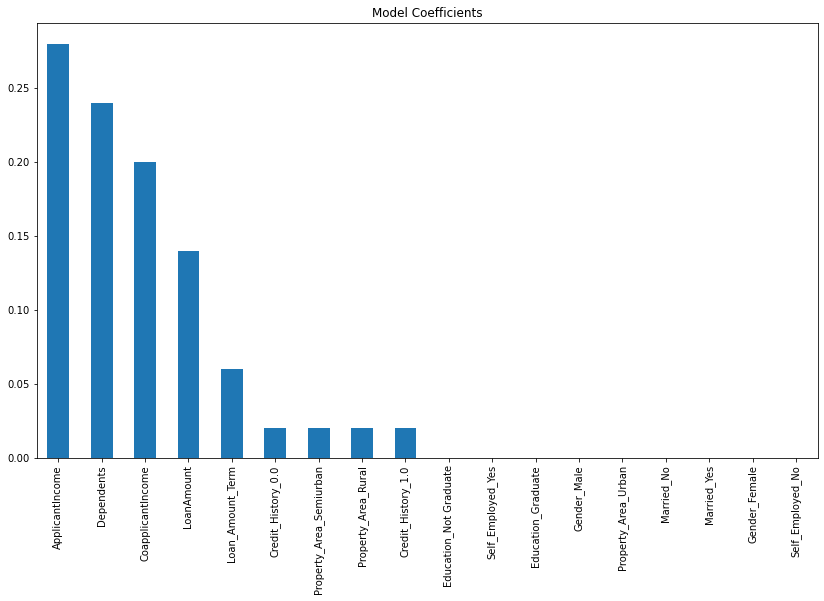

In [87]:
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier()

Model(ad)
coef = pd.Series(ad.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind= 'bar', title = 'Model Coefficients',figsize=(14,8))
plt.show()

In [88]:
from sklearn.ensemble import BaggingClassifier
bgg = BaggingClassifier()

Model(bgg)

Report for model BaggingClassifier()
The Accuracy Score is 78.66108786610879
Confussion Matrix : 
 [[ 82  21]
 [ 30 106]]
              precision    recall  f1-score   support

           0       0.73      0.80      0.76       103
           1       0.83      0.78      0.81       136

    accuracy                           0.79       239
   macro avg       0.78      0.79      0.78       239
weighted avg       0.79      0.79      0.79       239

Cross Validation Score is  77.54342431761785

Difference between accuracy score and cv is 1.1176635484909383


In [89]:
from sklearn.ensemble import GradientBoostingClassifier
gdb = GradientBoostingClassifier()

Model(gdb)

Report for model GradientBoostingClassifier()
The Accuracy Score is 80.3347280334728
Confussion Matrix : 
 [[ 75  28]
 [ 19 117]]
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       103
           1       0.81      0.86      0.83       136

    accuracy                           0.80       239
   macro avg       0.80      0.79      0.80       239
weighted avg       0.80      0.80      0.80       239

Cross Validation Score is  76.30476345441973

Difference between accuracy score and cv is 4.029964579053072


#### Best 3 Models are:

    - ExtraTreesClassifier = 0.19
    - BaggingClassifier = 1.12
    - KNeighborsClassifier = 1.94

### HyperParameter Tuning

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
et = ExtraTreesClassifier()
parameters={
        'n_estimators': [5,8,10,20,40,80,100],
        'criterion':["gini", "entropy"],
        'random_state':list(range(0,110)),
        'max_features':["auto", "sqrt", "log2"],
        'min_samples_leaf': list(range(2,20,2))
    }

gcv = GridSearchCV(et,parameters,cv=2,n_jobs=-1)
gcv.fit(x_train,y_train)
gcv.best_params_

{'criterion': 'gini',
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'n_estimators': 5,
 'random_state': 109}

In [92]:
gcv.best_estimator_

ExtraTreesClassifier(min_samples_leaf=2, n_estimators=5, random_state=109)

In [109]:
et = ExtraTreesClassifier(min_samples_leaf=2, n_estimators=5, random_state=109)
Model(et)

Report for model ExtraTreesClassifier(min_samples_leaf=2, n_estimators=5, random_state=109)
The Accuracy Score is 81.58995815899581
Confussion Matrix : 
 [[ 77  26]
 [ 18 118]]
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       103
           1       0.82      0.87      0.84       136

    accuracy                           0.82       239
   macro avg       0.81      0.81      0.81       239
weighted avg       0.82      0.82      0.81       239

Cross Validation Score is  77.67359557417728

Difference between accuracy score and cv is 3.916362584818529


In [118]:
bgg = BaggingClassifier()
parameters = {
    'n_estimators':[5,8,10,20,40,80,100,125,150],
    'random_state':list(range(0,110)),
    'max_features':[1, 2, 5, 10, 13,15,18]}
gcv = GridSearchCV(bgg,parameters,cv=2,n_jobs=-1)
gcv.fit(x_train,y_train)
gcv.best_params_

{'max_features': 5, 'n_estimators': 10, 'random_state': 60}

In [119]:
gcv.best_estimator_

BaggingClassifier(max_features=5, random_state=60)

In [123]:
bgg = BaggingClassifier(max_features=5,random_state=60)
Model(bgg)

Report for model BaggingClassifier(max_features=5, random_state=60)
The Accuracy Score is 80.75313807531381
Confussion Matrix : 
 [[ 71  32]
 [ 14 122]]
              precision    recall  f1-score   support

           0       0.84      0.69      0.76       103
           1       0.79      0.90      0.84       136

    accuracy                           0.81       239
   macro avg       0.81      0.79      0.80       239
weighted avg       0.81      0.81      0.80       239

Cross Validation Score is  80.0878655981776

Difference between accuracy score and cv is 0.6652724771362131


In [124]:
knn = KNeighborsClassifier()
parameters= {'n_neighbors':list(range(2,10)),
             'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
             'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
             'leaf_size':list(range(2,20))
            }
gcv = GridSearchCV(knn,parameters,cv=2,n_jobs=-1)
gcv.fit(x_train,y_train)
gcv.best_params_

{'algorithm': 'auto', 'leaf_size': 2, 'metric': 'manhattan', 'n_neighbors': 3}

In [125]:
gcv.best_estimator_

KNeighborsClassifier(leaf_size=2, metric='manhattan', n_neighbors=3)

In [126]:
knn = KNeighborsClassifier(leaf_size=2, metric='manhattan', n_neighbors=3)
Model(knn)

Report for model KNeighborsClassifier(leaf_size=2, metric='manhattan', n_neighbors=3)
The Accuracy Score is 79.07949790794979
Confussion Matrix : 
 [[ 81  22]
 [ 28 108]]
              precision    recall  f1-score   support

           0       0.74      0.79      0.76       103
           1       0.83      0.79      0.81       136

    accuracy                           0.79       239
   macro avg       0.79      0.79      0.79       239
weighted avg       0.79      0.79      0.79       239

Cross Validation Score is  78.79022088435097

Difference between accuracy score and cv is 0.2892770235988138


### Best Model : ExtraTreesClassifier without HyperParameter Tuning

Report for model ExtraTreesClassifier()
The Accuracy Score is 83.26359832635984
Confussion Matrix : 
 [[ 84  19]
 [ 21 115]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       103
           1       0.86      0.85      0.85       136

    accuracy                           0.83       239
   macro avg       0.83      0.83      0.83       239
weighted avg       0.83      0.83      0.83       239

Cross Validation Score is  83.19367042264977

Difference between accuracy score and cv is 0.06992790371006663


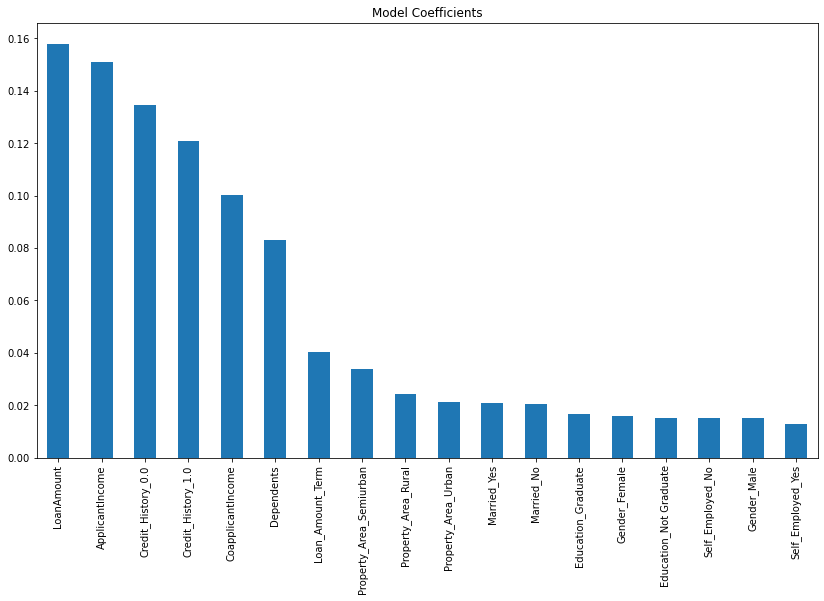

In [129]:
et = ExtraTreesClassifier()
Model(et)
coef = pd.Series(et.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind= 'bar', title = 'Model Coefficients',figsize=(14,8))
plt.show()

In [130]:
from sklearn.metrics import plot_roc_curve

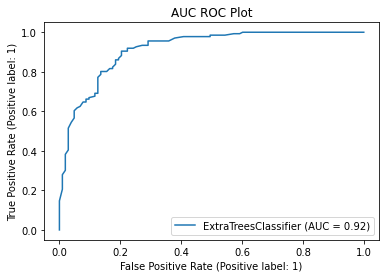

In [131]:
plot_roc_curve(et,x_test,y_test)
plt.title('AUC ROC Plot')
plt.show()

### Saving The Best Model

In [132]:
import pickle
file_name = 'Loan_Application_Status_Prediction.pkl'
pickle.dump(et,open(file_name,'wb'))